In [85]:
from datasets import load_dataset

regression_dataset_tmdb_raw_df = load_dataset("ada-datadruids/regression_dataset_tmdb")['train'].to_pandas()

In [86]:
from utils.regression_utils import adjust_for_inflation

regression_dataset_tmdb_raw_df = adjust_for_inflation(regression_dataset_tmdb_raw_df, ['budget', 'revenue'], is_plotting_enabled=False)
regression_dataset_tmdb_raw_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,based_on_book,movie_year,adjusted_budget,adjusted_revenue
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",False,2010,1.737071e+08,8.962556e+08
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",False,2014,1.650000e+08,7.017292e+08
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",False,2008,2.034170e+08,1.104564e+09
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",False,2009,2.615235e+08,3.226236e+09
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",False,2012,2.268438e+08,1.566063e+09


In [87]:
from utils.regression_utils import multi_one_hot_encode_columns

regression_dataset_tmdb_raw_df.drop(columns=['keywords', 'release_date', 'backdrop_path', 'homepage', 'original_title', 'overview', 'poster_path', 'tagline', 'production_companies', 'original_language','budget', 'imdb_id'], inplace=True)

regression_dataset_processed_df = multi_one_hot_encode_columns(
    regression_dataset_tmdb_raw_df,
    column_names_mohe=['genres', 'spoken_languages', 'production_countries'], # keywords not taken for now
    column_names_ohe=['status'],
)


In [88]:
from utils.regression_utils import create_train_test_split
import pandas as pd

from sklearn.preprocessing import StandardScaler

columns = ['vote_count', 'movie_year', 'adjusted_budget', 'adjusted_revenue', 'runtime', 'popularity', 'vote_average', 'genres_Adventure', 'genres_count']

# split_dict = create_train_test_split(
#     regression_dataset_processed_df,
#     target_column='revenue',
#     should_split_based_on_book=True,
#     test_size=0.2,
#     seed=42
# )

scaler = StandardScaler()
scaler.fit_transform(regression_dataset_processed_df[columns])

regression_dataset_normalized= pd.DataFrame(scaler.transform(regression_dataset_processed_df[columns]), columns=columns)
regression_dataset_normalized["id"] = regression_dataset_processed_df["id"]
regression_dataset_normalized["notnorm_revenue"] = regression_dataset_processed_df["adjusted_revenue"]
regression_dataset_normalized["notnorm_budget"] = regression_dataset_processed_df["adjusted_budget"]
regression_dataset_normalized["based_on_book"] = regression_dataset_processed_df["based_on_book"]
regression_dataset_normalized["title"] = regression_dataset_processed_df["title"]

print(regression_dataset_normalized['based_on_book'].sum())


# X_train_based_on_book, X_test_based_on_book, y_train_based_on_book, y_test_based_on_book = split_dict['based_on_book']
# X_train_not_based_on_book, X_test_not_based_on_book, y_train_not_based_on_book, y_test_not_based_on_book = split_dict['not_based_on_book']

X_not_book = regression_dataset_normalized[regression_dataset_normalized['based_on_book'] == False].copy().reset_index(drop=True)
X_book = regression_dataset_normalized[regression_dataset_normalized['based_on_book'] == True].copy().reset_index(drop=True)

658


In [89]:
columns = ['vote_count', 'movie_year', 'adjusted_budget', 'adjusted_revenue', 'runtime', 'popularity', 'vote_average', 'genres_Adventure', 'genres_count']


print(X_not_book)

      vote_count  movie_year  adjusted_budget  adjusted_revenue   runtime  \
0      11.937342    0.759024         3.478228          3.928964  1.312824   
1      11.244760    0.976144         3.269037          2.984607  1.923253   
2      10.542098    0.650463         4.192020          4.940226  1.429097   
3      10.252682    0.704743         5.588050         15.240198  1.719777   
4      10.019061    0.867584         4.754857          7.180643  1.167484   
...          ...         ...              ...               ...       ...   
7681   -0.479825    0.487623        -0.695148         -0.422012 -2.989247   
7682   -0.479825    0.541903        -0.686968         -0.416512  0.934940   
7683   -0.479825    0.487623        -0.687207         -0.420276  1.516301   
7684   -0.479825    0.379063        -0.679691         -0.414607 -0.402190   
7685   -0.479825    0.704743        -0.655383         -0.418689 -0.692871   

      popularity  vote_average  genres_Adventure  genres_count      id  \
0

In [90]:
coeffs = [0.4600, -0.2071, 0.1357, 0.058, 0.039, -0.028, 0.026, -0.005]
X_book["Propensity"] = coeffs[0] * X_book["vote_count"] + coeffs[1] * X_book["movie_year"] + coeffs[2] * X_book["adjusted_budget"] + coeffs[3] * X_book["runtime"] + coeffs[4] * X_book["popularity"] + coeffs[5] * X_book["vote_average"] + coeffs[6] * X_book["genres_Adventure"] + coeffs[7] * X_book["genres_count"]
X_not_book["Propensity"] = coeffs[0] * X_not_book["vote_count"] + coeffs[1] * X_not_book["movie_year"] + coeffs[2] * X_not_book["adjusted_budget"] + coeffs[3] * X_not_book["runtime"] + coeffs[4] * X_not_book["popularity"] + coeffs[5] * X_not_book["vote_average"] + coeffs[6] * X_not_book["genres_Adventure"] + coeffs[7] * X_not_book["genres_count"]

X_not_book_drop = X_not_book.copy()
pairs = []
for index in range(len(X_book)):
    df_sort = X_not_book_drop.iloc[(X_not_book_drop['Propensity']-X_book["Propensity"][index]).abs().argsort()[:2]]
    df_sort = abs(X_book['Propensity'][index] - df_sort["Propensity"])
    df_sort.sort_values(inplace=True)
    if df_sort[df_sort.index[0]] / abs(X_book["Propensity"][index]) <= 0.001:
            pairs.append([index, df_sort.index[0]])
            X_not_book_drop.drop(df_sort.index[0], inplace=True)
            

print("Out of %d films, %d were matched" % (len(X_book), len(pairs)))
print(X_book.iloc[pairs[0][0]])
print(X_not_book.iloc[pairs[0][1]])

Out of 658 films, 430 were matched
vote_count                                                   7.915756
movie_year                                                   0.270503
adjusted_budget                                              2.292164
adjusted_revenue                                             5.233671
runtime                                                      2.213934
popularity                                                   4.828216
vote_average                                                 1.310431
genres_Adventure                                             2.414156
genres_count                                                 0.542578
id                                                                120
notnorm_revenue                                     1165009824.442571
notnorm_budget                                       124339967.055723
based_on_book                                                    True
title               The Lord of the Rings: The Fellowsh

75646209.41115627 70022257.13347267 6312725.386972085 15651446.8600295
The revenue of the book based film was better for a total of 232 times out of 430 (ratio 0.5395)


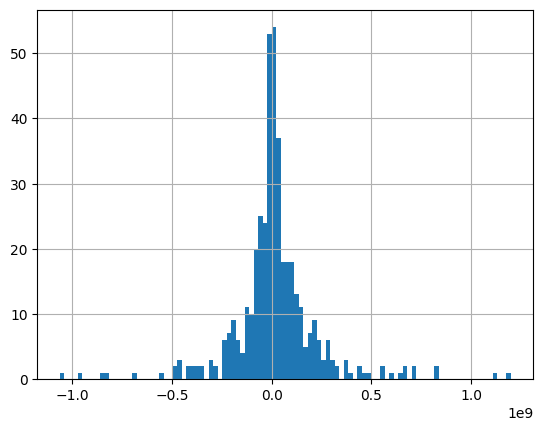

In [91]:
import numpy as np
import matplotlib.pyplot as plt
sum = 0
book_rev = []
not_book_rev = []
book_perc = []
total_rev = []
for i in range(len(pairs)):
    sum += (X_book['adjusted_revenue'][pairs[i][0]]) >= (X_not_book['adjusted_revenue'][pairs[i][1]])
    book_rev.append(X_book['notnorm_revenue'][pairs[i][0]])
    not_book_rev.append(X_not_book['notnorm_revenue'][pairs[i][1]])

    book_perc.append((X_book["notnorm_revenue"][pairs[i][0]] - X_not_book["notnorm_revenue"][pairs[i][1]]))#/X_not_book["notnorm_revenue"][pairs[i][1]])
    total_rev.append((X_book["notnorm_revenue"][pairs[i][0]] - X_not_book["notnorm_revenue"][pairs[i][1]]))
print(np.median(book_rev), np.median(not_book_rev), np.median(np.sort(book_perc)[0:-1]), np.mean(np.sort(book_perc)[0:-1]))
plt.hist(np.sort(book_perc)[0:-1], bins=100)
plt.grid()
print("The revenue of the book based film was better for a total of %d times out of %d (ratio %.4f)" %(sum, len(pairs), sum/len(pairs)))

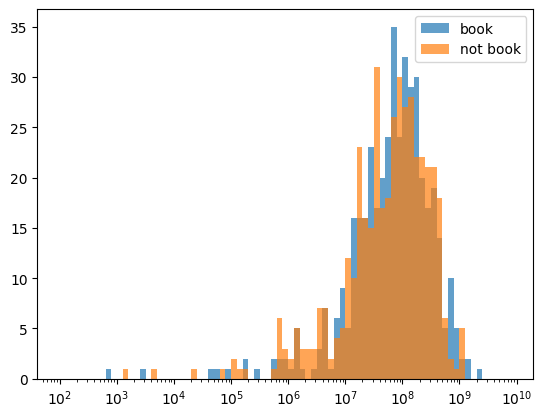

In [122]:
bins = 10**(np.arange(2, 10, step=0.1))
plt.xscale('log')
plt.hist(X_book["notnorm_revenue"][np.sort([pairs[i][0] for i in range(len(pairs))])], bins=bins, alpha=0.7)
plt.hist(X_not_book["notnorm_revenue"][[pairs[i][1] for i in range(len(pairs))]], bins=bins, alpha=0.7)

plt.legend(["book", "not book"])

In [121]:
for item in range(20):
    i = total_rev.index(np.sort(total_rev)[-(item + 1)])
    print("The biggest total revenue is found with %s and %s with a difference of: %.0f" % (X_book["title"][pairs[i][0]], X_not_book["title"][pairs[i][1]], book_perc[i]))
    print(X_book.iloc[pairs[i][0]])
    print(X_not_book.iloc[pairs[i][1]])

The biggest total revenue is found with Jaws and Mulan with a difference of: 1628410505
vote_count                  2.954649
movie_year                  -1.14078
adjusted_budget             0.044652
adjusted_revenue            9.628892
runtime                     0.615191
popularity                  1.316278
vote_average                0.909863
genres_Adventure            2.414156
genres_count                0.542578
id                               578
notnorm_revenue     2070373249.61598
notnorm_budget       30792564.261381
based_on_book                   True
title                           Jaws
Propensity                  1.723048
Name: 40, dtype: object
vote_count                  2.731108
movie_year                  0.107662
adjusted_budget             2.445123
adjusted_revenue            1.723532
runtime                    -0.431258
popularity                  3.890764
vote_average                1.047878
genres_Adventure            2.414156
genres_count                0.542578


In [94]:
test = [1,2 , 3,4 ,5 , 2.4]
print(np.sort(test))
print(test)


[1.  2.  2.4 3.  4.  5. ]
[1, 2, 3, 4, 5, 2.4]
